In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import pickle
import joblib

In [2]:
dataset = pd.read_csv("./dataset/Churn_Modelling.csv")

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
x = dataset.iloc[:, 3:-1]
y = dataset.iloc[:, -1].values

In [5]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


# Exploratory Data Analysis

Text(0.5, 0.98, 'CreditScore vs Balance')

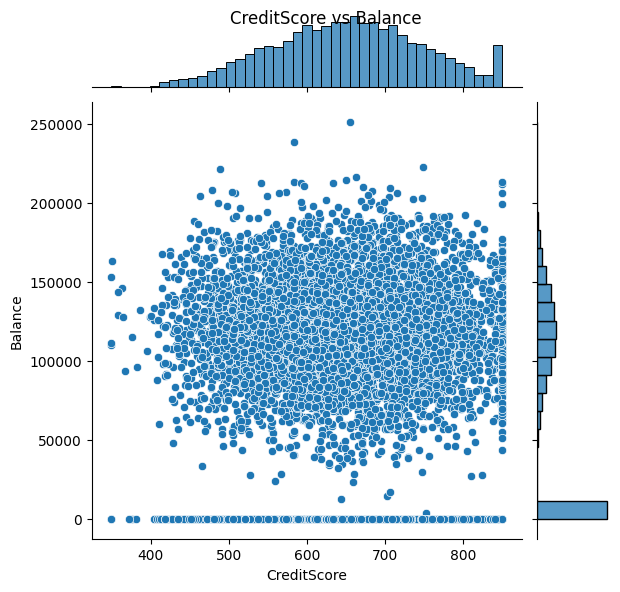

In [6]:
jp = sns.jointplot(x='CreditScore', y='Balance', data=dataset)
jp.fig.suptitle('CreditScore vs Balance')

Text(0.5, 0.98, 'Age vs EstimatedSalary')

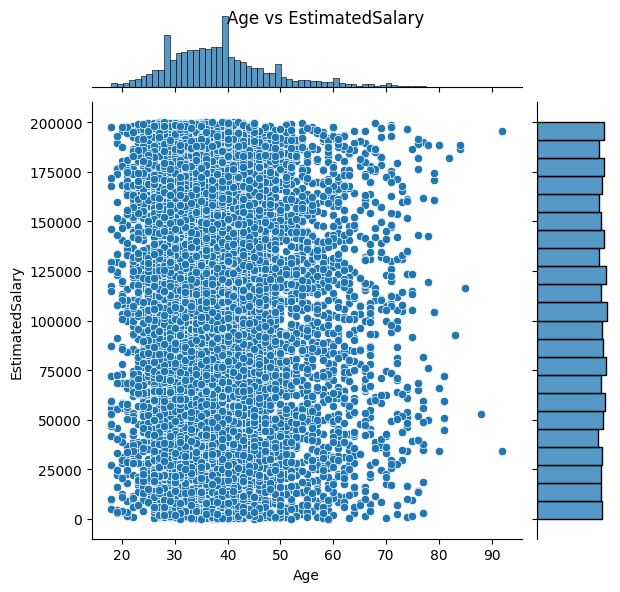

In [7]:
jp = sns.jointplot(data=dataset, x='Age', y='EstimatedSalary')
jp.fig.suptitle('Age vs EstimatedSalary')

In [8]:
x.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [9]:
x = pd.get_dummies(x, drop_first=True)

In [10]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


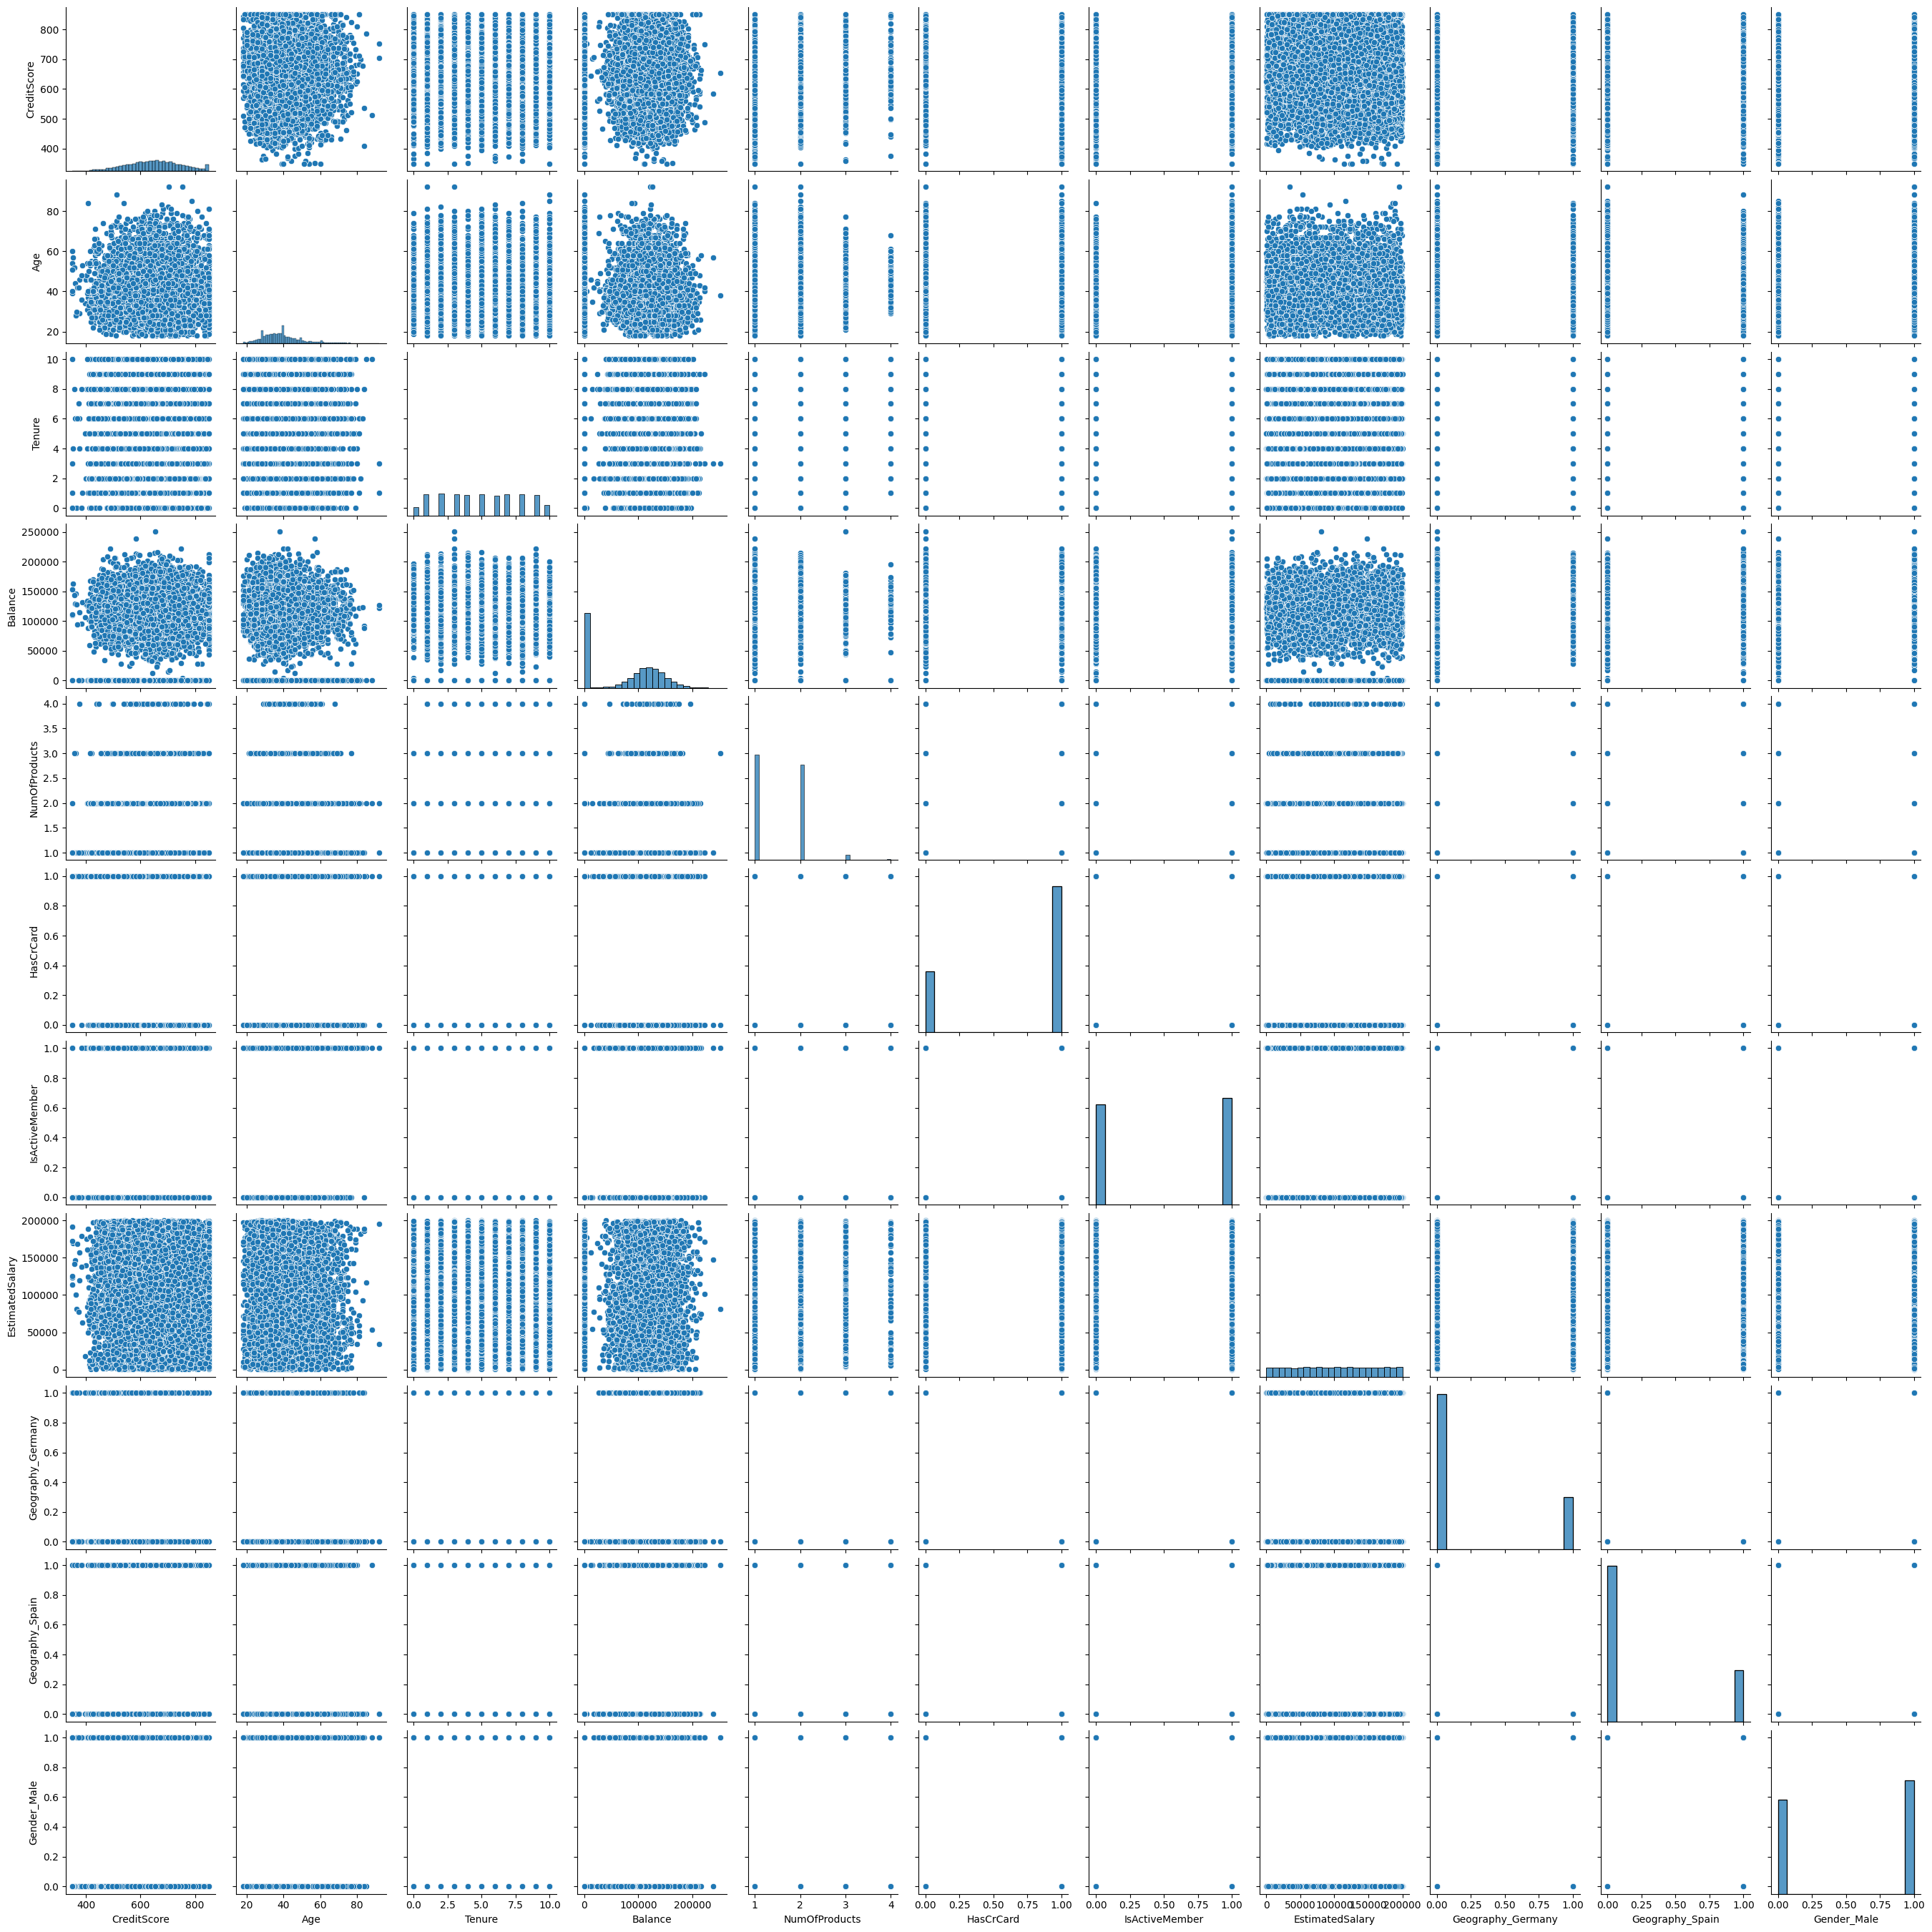

In [11]:
g = sns.pairplot(x, diag_kws=dict(fill=True))

# Implementing ML model

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=0)

In [13]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5823,751,51,7,148074.79,1,1,0,146411.41,1,0,0
2217,666,35,2,104832.49,1,1,0,175015.12,0,1,1
6423,652,41,8,115144.68,1,1,0,188905.43,0,1,1
5783,624,71,7,0.00,2,1,1,108841.83,0,0,1
937,850,44,5,128605.32,1,0,1,171096.20,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2795,515,25,7,79543.59,1,0,1,38772.82,0,0,0
1733,614,32,7,99462.80,2,1,1,51117.06,1,0,1
4674,850,41,1,176958.46,2,0,1,125806.30,1,0,1
6633,729,42,7,0.00,2,1,0,58268.20,0,1,0


In [14]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
x_train

array([[ 1.03682098,  1.15867808,  0.69679344, ...,  1.72232466,
        -0.57191626, -1.09379268],
       [ 0.15827867, -0.37159838, -1.0351044 , ..., -0.58061063,
         1.74850772,  0.91425004],
       [ 0.01357758,  0.20225529,  1.043173  , ..., -0.58061063,
         1.74850772,  0.91425004],
       ...,
       [ 2.06006438,  0.20225529, -1.38148396, ...,  1.72232466,
        -0.57191626,  0.91425004],
       [ 0.80943356,  0.29789757,  0.69679344, ..., -0.58061063,
         1.74850772, -1.09379268],
       [ 0.95413465, -1.32802118,  0.35041387, ..., -0.58061063,
         1.74850772,  0.91425004]])

In [16]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
y_pred = rf.predict(x_test)

In [18]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[1158   36]
 [ 175  131]]
0.8593333333333333


In [21]:
joblib.dump(rf, r'.\models\rf.sav')

['.\\models\\rf.sav']

In [22]:
joblib.dump(sc, r'.\models\sc.sav')

['.\\models\\sc.sav']